<a href="https://colab.research.google.com/github/SaizMarcelo/Proyecto_2_Big_Data_y_Machine_Learning/blob/main/Canciones_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elementos de aprendizaje de máquina y big data - T.U. en Tec. de Programación
# PRÁCTICO NRO. 2 - MACHINE LEARNING

## Integrantes Grupo 2: Antonella Santi, Pisciolari Chauvie Federico Nicolas, Marcelo Saiz y Matias Manino


## Información inicial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Leemos el csv
# Desde google drive
# atributos_spotify = pd.read_csv("/content/drive/MyDrive/Universidad/Programacion/BigData/Practico2/Canciones_Spotify.csv")

# Desde github
atributos_spotify = pd.read_csv("https://github.com/SaizMarcelo/Proyecto_2_Big_Data_y_Machine_Learning/blob/main/Canciones_Spotify.csv?raw=true")

atributos_spotify

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1             0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2             0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3             0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4             0.512000    5    0.4390   -11.648     0       0.0694  174.004   
...                ...  ...       ...       ...   ...          ...      ...   
2012          0.002690    1    0.1290    -3.501     1       0.3330   74.976   
2013          0.001670    1    0.0528    -2.663     1       0.1310  110.041   
2014          0.003990    0    0.2140    -2.467     1       0.1070  150.082   
2015          0.677000    1    0.0913    -2.735     1       0.1330  150.011   
2016          0.000039    9    0.2180    -6.221     1       0.1410  190.013   

      time_signature  valence  target                            song_title  \
0                4.0    0.286       1                              Mask Off   
1                4.0    0.588       1                               Redbone   
2                4.0    0.173       1                          Xanny Family   
3                4.0    0.230       1                        Master Of None   
4                4.0    0.904       1                        Parallel Lines   
...              ...      ...     ...                                   ...   
2012             4.0    0.211       0   Like A Bitch - Kill The Noise Remix   
2013             4.0    0.867       0                                 Candy   
2014             4.0    0.470       0  Habit - Dack Janiels & Wenzday Remix   
2015             4.0    0.623       0                         First Contact   
2016             4.0    0.402       0                    I Wanna Get Better   

                artist  
0               Future  
1     Childish Gambino  
2               Future  
3          Beach House  
4          Junior Boys  
...                ...  
2012    Kill The Noise  
2013    Dillon Francis  
2014          Rain Man  
2015        Twin Moons  
2016         Bleachers  

[2017 rows x 17 columns]

In [ ]:
print("forma del dataset")
print(atributos_spotify.shape)

n_samples, n_features = atributos_spotify.shape

print("número de muestras del dataset")
print(n_samples)

print("número de características del dataset")
print(n_features)

# Verifico que el dataset esté balanceado
print("Balance de los datos:")
balance = atributos_spotify['target'].value_counts()
for target, count in balance.items():
    print(f"{target}: {count}")

forma del dataset
(2017, 17)
número de muestras del dataset
2017
número de características del dataset
17
Balance de los datos:
1: 1020
0: 997


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

## Elección de las variables a utilizar

### Del total de características que hay, vamos a elegir solo algunas.
## Primero graficaremos con pairplot para tener un panorama global y visual de los datos.
## Luego, realizaremos una matriz de correlación para ver el grado de relación lineal entre cada par de variables, incluído el target.

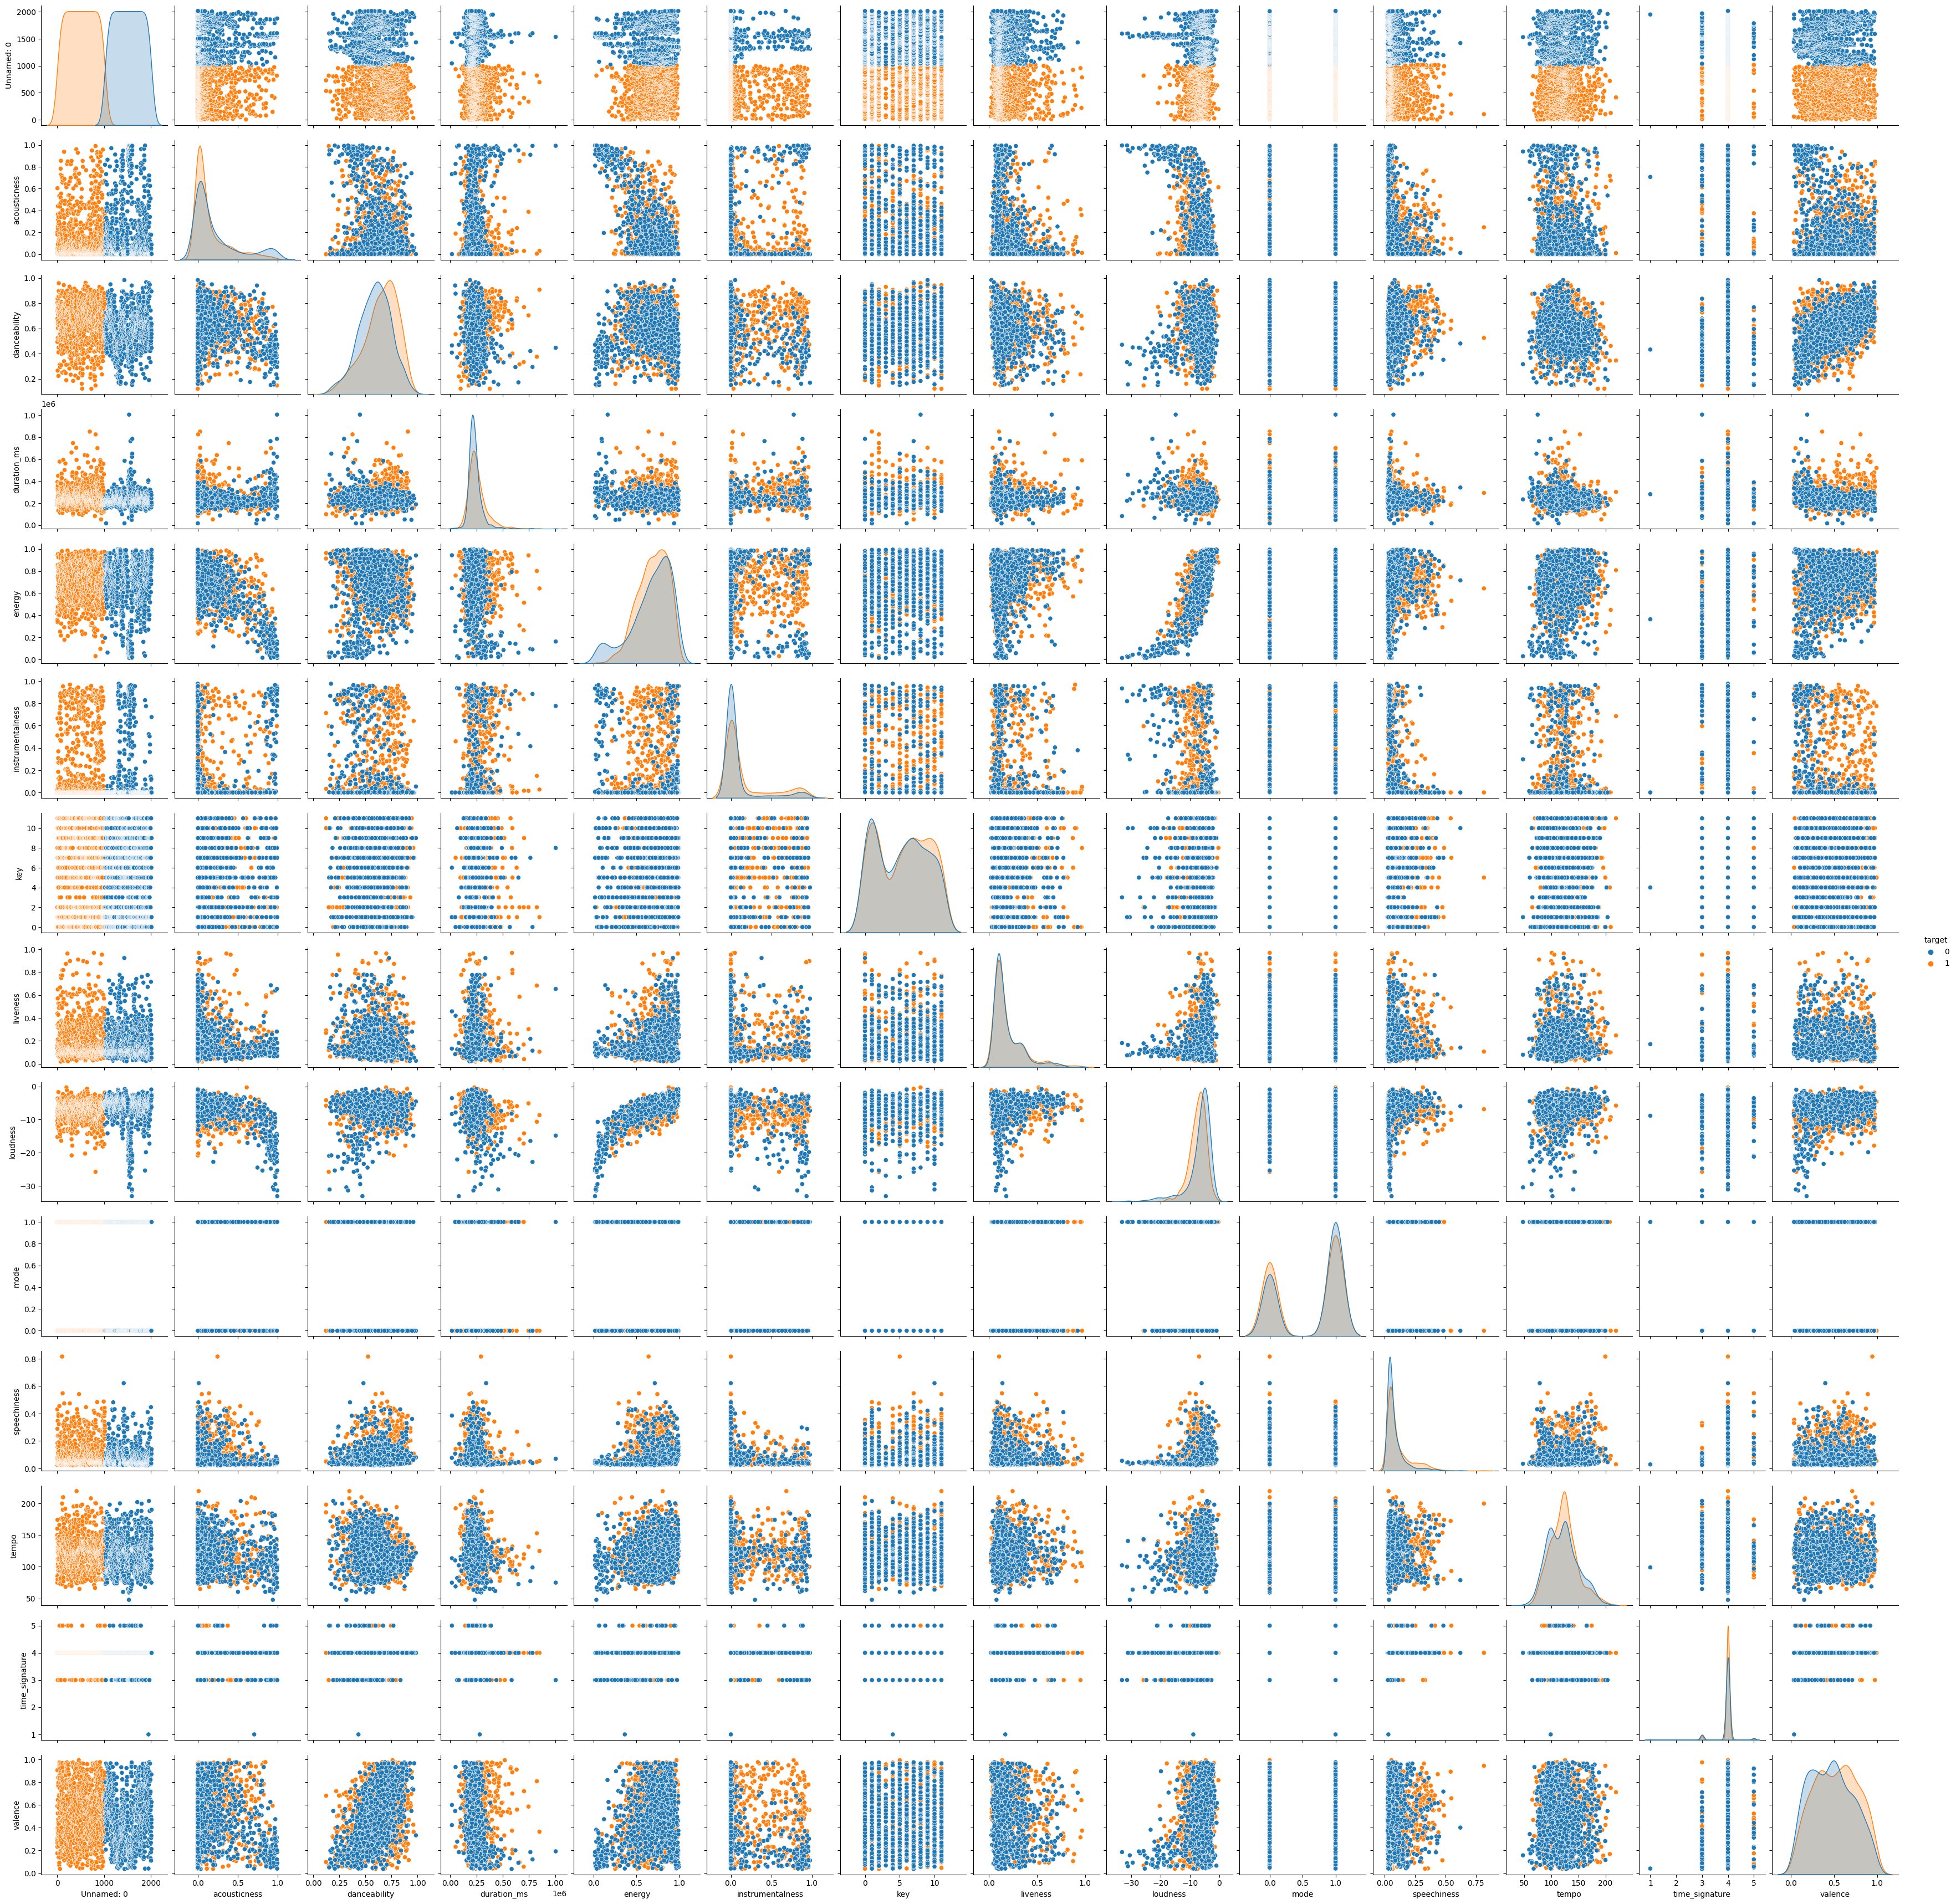

In [ ]:
# Visualización de los datos: la función pairplot permite deducir visualmente si puede llegar a existir un patrón o no
# en los datos.

sns.pairplot(atributos_spotify, hue= 'target')

#Los puntos de colores representan a la variable y: 1 o 0.
#Al visualizar algunas de las relaciones entre variables, vemos que estos puntos suelen estar mezclados,
#pero en algunas se diferencian un poco mas que otras.

<ipython-input-7-55954da84399>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = atributos_spotify.corr()


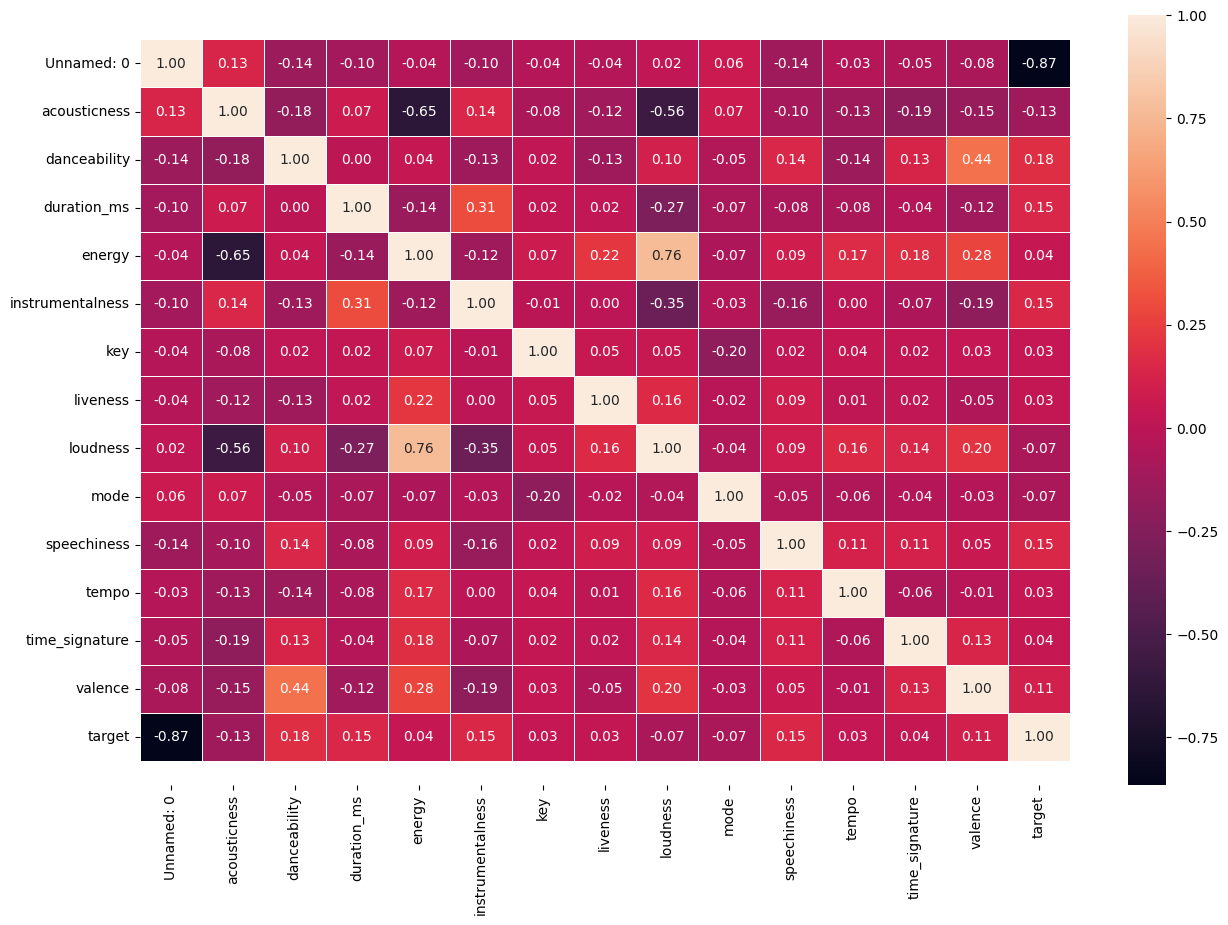

In [ ]:
# Matriz de correlación: Relación de cada variable con otra

corr_matrix = atributos_spotify.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap =None )

bottom, top = ax.get_ylim()
plt.yticks(rotation = 0)
ax.set_ylim(bottom + 0.5, top - 0.5);

#Un valor positivo más alto significa una correlación positiva potencial (aumento)
#y un valor negativo más alto significa una correlación negativa potencial (disminución)

#Por esto, a partir de esta matriz, las variables elegidas serán:  PREGUNTAR! NINGUNA ME DA VALOR SIGNIFICATIVO

#**Primer modelo de ML: K-NEAREST NEIGHBORS**

##Importamos las librerias que vamos a utilizar para el analisis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

##Partimos de un DataSet de canciones de Spotify.

In [ ]:
# Vemos la estructura del CSV
atributos_spotify

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1             0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2             0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3             0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4             0.512000    5    0.4390   -11.648     0       0.0694  174.004   
...                ...  ...       ...       ...   ...          ...      ...   
2012          0.002690    1    0.1290    -3.501     1       0.3330   74.976   
2013          0.001670    1    0.0528    -2.663     1       0.1310  110.041   
2014          0.003990    0    0.2140    -2.467     1       0.1070  150.082   
2015          0.677000    1    0.0913    -2.735     1       0.1330  150.011   
2016          0.000039    9    0.2180    -6.221     1       0.1410  190.013   

      time_signature  valence  target                            song_title  \
0                4.0    0.286       1                              Mask Off   
1                4.0    0.588       1                               Redbone   
2                4.0    0.173       1                          Xanny Family   
3                4.0    0.230       1                        Master Of None   
4                4.0    0.904       1                        Parallel Lines   
...              ...      ...     ...                                   ...   
2012             4.0    0.211       0   Like A Bitch - Kill The Noise Remix   
2013             4.0    0.867       0                                 Candy   
2014             4.0    0.470       0  Habit - Dack Janiels & Wenzday Remix   
2015             4.0    0.623       0                         First Contact   
2016             4.0    0.402       0                    I Wanna Get Better   

                artist  
0               Future  
1     Childish Gambino  
2               Future  
3          Beach House  
4          Junior Boys  
...                ...  
2012    Kill The Noise  
2013    Dillon Francis  
2014          Rain Man  
2015        Twin Moons  
2016         Bleachers  

[2017 rows x 17 columns]

##Creamos un dataSet con las Caracteristicas iniciales para realizar el analisis.

In [ ]:
dataSetTrabajo= atributos_spotify[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence','tempo','target']]

## Creamos una funcion que nos va a devolver una lista de listas con todas las posibles combinaciones de caracteristicas para un posterior analisis.

In [ ]:
# Librerias
from re import T
import itertools

# Volvemos a cargar en una variable el DataSet para tener un duplicado que sera el que se utilizara para procesar.
df = dataSetTrabajo[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence','tempo','target']]

# Creamos una funcion que nos devuelva una lsita de listas de todas las posibles combinaciones de las diferentes caracteristicas sin tener en cuenta el target.
def combinaciones_df_2(df):
    # Separamos columnas
    columnas = df.columns
    # Separamos columnas sin tener en cuenta el target
    columnas_sin_target = [col for col in columnas if col != 'target']
    # Creamos una lista vacia donde se iran incorporando todas las tuplas de las posibles combinaciones.
    todas_combinaciones = []
    # Creamos una lista de tuplas con todas las posibles combinaciones de las columnas sin tener en cuenta el target.
    for i in range(2, len(columnas_sin_target)+1):
        combinaciones = list(itertools.combinations(columnas_sin_target, i))
        todas_combinaciones.extend(combinaciones)
    # Creamos una lista final donde se iran guardando todas las 'listas' con las posibles combinaciones de las diferentes columnas.
    lista_final = []
    # Recorremos la lista de tuplas y le agregamos el target y la incorporamos con formato de lista a la lista.
    for tupla in todas_combinaciones:
      lista_add = list(tupla+('target',))
      lista_final.append(lista_add)
    # Retornamos una lista de listas con todas las posibles combinaciones.
    return lista_final

# Incorporamos el resultado de la funcion en una variable para que persista y poder utilizarla.
lista_a_procesar = combinaciones_df_2(df)
# Imprimimos para ver la estructura
print(lista_a_procesar)
# Imprimimos resultado en cantidades existentes:
print(f"Existen {len(lista_a_procesar)} combinaciones posibles de las diferentes caracteristicas del DataSet para crear diferentes modelos.")

[['danceability', 'energy', 'target'], ['danceability', 'loudness', 'target'], ['danceability', 'speechiness', 'target'], ['danceability', 'acousticness', 'target'], ['danceability', 'instrumentalness', 'target'], ['danceability', 'valence', 'target'], ['danceability', 'tempo', 'target'], ['energy', 'loudness', 'target'], ['energy', 'speechiness', 'target'], ['energy', 'acousticness', 'target'], ['energy', 'instrumentalness', 'target'], ['energy', 'valence', 'target'], ['energy', 'tempo', 'target'], ['loudness', 'speechiness', 'target'], ['loudness', 'acousticness', 'target'], ['loudness', 'instrumentalness', 'target'], ['loudness', 'valence', 'target'], ['loudness', 'tempo', 'target'], ['speechiness', 'acousticness', 'target'], ['speechiness', 'instrumentalness', 'target'], ['speechiness', 'valence', 'target'], ['speechiness', 'tempo', 'target'], ['acousticness', 'instrumentalness', 'target'], ['acousticness', 'valence', 'target'], ['acousticness', 'tempo', 'target'], ['instrumentalne

## Creamos una funcion que tarda 11 minutos en procesar pero lo que ejectua es un modelo por cada combinacion de caracteristicas informando cual es Eficiencia, K optimo y Conjunto de caracteristicas que mejor representan al modelo.

## Creamos una funcion que tarda 11 minutos en procesar pero lo que ejectua es un modelo por cada combinacion de caracteristicas informando cual es Eficiencia, K optimo y Conjunto de caracteristicas que mejor representan al modelo.

In [ ]:
# MODELO KNN:

df_eficiencia = pd.DataFrame(columns=['Caracteristicas', 'Eficiencia', 'K'])

for combinacion in lista_a_procesar:
  # Creamos los diferentes dataSet con las diferentes combinaciones de caracteristicas para analizar.
  dataFrame_100 = dataSetTrabajo[combinacion]

  # Separamos los datos de las etiquetas: target.
  X = dataFrame_100.iloc[:, :-1].values
  y = dataFrame_100.iloc[:, -1].values

  # Separamos los datos en Entrenamiento y Testeo:
  X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=42)

  # Posibles K
  k_range = np.arange(1,20)

  # Clasificador
  knn = KNeighborsClassifier()

  # Parametros:
  param_grid = {'n_neighbors': k_range}

  # Buscamos el GridSerchCV optimo:
  knn_gscv = GridSearchCV(knn, param_grid, cv=5)

  # Entrenamos el modelo optimo
  knn_gscv.fit(X_train80, y_train80.ravel())

  # Prediccion:
  y_pred = knn_gscv.predict(X_test20)

  # Accuracy
  # accuracy = accuracy_score(y_test20, y_pred)

  # Parametros optimos:
  k = knn_gscv.best_params_['n_neighbors']
  accuracy = knn_gscv.best_score_

  # Imprimimos eficiencia:
  # print(f"******     La semillas {semilla} genera un modelo con un nivel de eficiencia del {accuracy} con un Gamma optimo {best_gamma} y un C optimo de {best_C}")
  registro_incorporar = {'Caracteristicas': combinacion, 'Eficiencia': accuracy, 'K': k}
  # convierto la estructura de diccionario a dataFrame para incorporar al dataFrame.
  df_regitro_incorporar = pd.DataFrame([registro_incorporar])
  # Incorporo el registro al dataFrame existente:
  df_eficiencia.loc[len(df_eficiencia)] = df_regitro_incorporar.loc[0]
  # df_eficiencia = df_eficiencia.append(df_regitro_incorporar, ignore_index=True)

df_eficiencia.reset_index()
# Ordenamos el dataFrame de mayor a menor para conocer la mayor Eficiencia y la estructura optima
df_ordenado = df_eficiencia.sort_values('Eficiencia', ascending=False)
df_ordenado

Caracteristicas Eficiencia   K
210  [danceability, energy, loudness, speechiness, ...   0.684434  12
238  [danceability, energy, loudness, speechiness, ...   0.681949  13
155  [danceability, energy, loudness, speechiness, ...   0.680711  16
55     [energy, speechiness, instrumentalness, target]   0.678245  19
231  [energy, loudness, speechiness, acousticness, ...   0.678234  18
..                                                 ...        ...  ..
11                           [energy, valence, target]   0.554878   7
24                       [acousticness, tempo, target]    0.55301   8
20                      [speechiness, valence, target]   0.550543  17
21                        [speechiness, tempo, target]   0.547434   3
12                             [energy, tempo, target]   0.542474  17

[247 rows x 3 columns]

## En funcion del mejor modelo obtenido anteriormente, vamos a ver su consistencia ante la variacion en los datos utilizados, utilizando diferentes semillas.

In [ ]:
# Semilla aplicada:
lista_semillas = [1,15,30,80,100]

for semilla in lista_semillas:
  # Creamos los diferentes dataSet con las diferentes combinaciones de caracteristicas para analizar.
  dataFrame_100 = dataSetTrabajo[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','target']]

  # Separamos los datos de las etiquetas: target.
  X = dataFrame_100.iloc[:, :-1].values
  y = dataFrame_100.iloc[:, -1].values

  # Separamos los datos en Entrenamiento y Testeo:
  X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=semilla)

  # Creamos el modelo:
  clasificadorKNN = KNeighborsClassifier(n_neighbors=12)
  clasificadorKNN.fit(X_train80, y_train80.ravel())

  # Prediccion:
  y_pred = clasificadorKNN.predict(X_test20)

  # Accuracy
  accuracy = accuracy_score(y_test20, y_pred)
  score = cross_val_score(clasificadorKNN, X_train80, y_train80.ravel(), cv=5)

  print(f"---- Semillas {semilla}")
  print(f"****** Modelo Eficiencia: {accuracy}")
  print(f"****** Modelo Score: {score}")
  print(f"****** Modelo Score promedio: {score.mean()}")

---- Semillas 1
****** Modelo Eficiencia: 0.6707920792079208
****** Modelo Score: [0.65634675 0.65634675 0.65634675 0.66459627 0.68944099]
****** Modelo Score promedio: 0.6646155029517529
---- Semillas 15
****** Modelo Eficiencia: 0.6782178217821783
****** Modelo Score: [0.65634675 0.64705882 0.6749226  0.69254658 0.64906832]
****** Modelo Score promedio: 0.6639886160413823
---- Semillas 30
****** Modelo Eficiencia: 0.7079207920792079
****** Modelo Score: [0.64396285 0.67801858 0.64705882 0.65217391 0.6863354 ]
****** Modelo Score promedio: 0.661509912889641
---- Semillas 80
****** Modelo Eficiencia: 0.6633663366336634
****** Modelo Score: [0.6749226  0.65325077 0.63157895 0.67391304 0.69254658]
****** Modelo Score promedio: 0.6652423898621234
---- Semillas 100
****** Modelo Eficiencia: 0.7153465346534653
****** Modelo Score: [0.625387   0.68421053 0.68421053 0.68322981 0.67701863]
****** Modelo Score promedio: 0.6708112993481145


##Creamos la MATRIZ DE CONFUSION para ver los ressultados de la aplicacion del modelo.

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       200
           1       0.82      0.55      0.66       204

    accuracy                           0.72       404
   macro avg       0.74      0.72      0.71       404
weighted avg       0.74      0.72      0.71       404



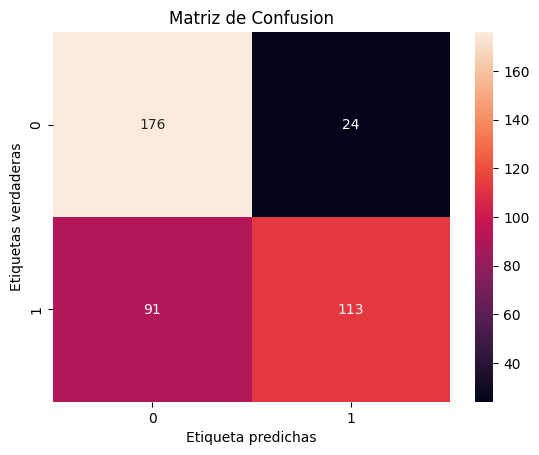

Score de validacion accuracy: 0.7153465346534653
Score de validacion cruzada: [0.625387   0.68421053 0.68421053 0.68322981 0.67701863]
Media de los scores: 0.6708112993481145
Desviacion estandar de los scores: 0.02287005166062251


In [ ]:
# DataFrame
dataFrame_100 = dataSetTrabajo[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','target']]
# Caracteristicas y Target
X = dataFrame_100.iloc[:, :-1].values
y = dataFrame_100.iloc[:, -1].values
# DIVIDIMOS DATOS EN ENTRENAMIENTO Y TESTEO
X_train80, X_test20, y_train80, y_test20 = train_test_split(dataFrame_100.iloc[:,:-1], dataFrame_100.iloc[:,-1], test_size=0.2, random_state=100)
# MEJOR MODELO
# Creamos el modelo:
clasificadorKNN = KNeighborsClassifier(n_neighbors=12)
clasificadorKNN.fit(X_train80, y_train80.ravel())
scores = cross_val_score(clasificadorKNN,X_train80, y_train80.ravel(), cv=5)
accuracy = accuracy_score(y_test20, y_pred)
# Prediccion:
y_pred = clasificadorKNN.predict(X_test20)
# MATRIZ DE CONFUSION
c= confusion_matrix(y_test20,y_pred)
# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, y_pred))
#plt.figure(figsize =(2,2))
sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

# Score de validacion cruzada:
print(f"Score de validacion accuracy: {accuracy}")
print(f"Score de validacion cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviacion estandar de los scores: {scores.std()}")


#**Seguno modelo de ML: SUPPORT VECTOR MACHINES**


## Librerias que vamos a utilizar para realizar el analisis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

##Partimos de un DataSet de canciones de Spotify.

In [ ]:
# Vemos la estructura del CSV

atributos_spotify

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1             0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2             0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3             0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4             0.512000    5    0.4390   -11.648     0       0.0694  174.004   
...                ...  ...       ...       ...   ...          ...      ...   
2012          0.002690    1    0.1290    -3.501     1       0.3330   74.976   
2013          0.001670    1    0.0528    -2.663     1       0.1310  110.041   
2014          0.003990    0    0.2140    -2.467     1       0.1070  150.082   
2015          0.677000    1    0.0913    -2.735     1       0.1330  150.011   
2016          0.000039    9    0.2180    -6.221     1       0.1410  190.013   

      time_signature  valence  target                            song_title  \
0                4.0    0.286       1                              Mask Off   
1                4.0    0.588       1                               Redbone   
2                4.0    0.173       1                          Xanny Family   
3                4.0    0.230       1                        Master Of None   
4                4.0    0.904       1                        Parallel Lines   
...              ...      ...     ...                                   ...   
2012             4.0    0.211       0   Like A Bitch - Kill The Noise Remix   
2013             4.0    0.867       0                                 Candy   
2014             4.0    0.470       0  Habit - Dack Janiels & Wenzday Remix   
2015             4.0    0.623       0                         First Contact   
2016             4.0    0.402       0                    I Wanna Get Better   

                artist  
0               Future  
1     Childish Gambino  
2               Future  
3          Beach House  
4          Junior Boys  
...                ...  
2012    Kill The Noise  
2013    Dillon Francis  
2014          Rain Man  
2015        Twin Moons  
2016         Bleachers  

[2017 rows x 17 columns]

In [ ]:
dataSetTrabajo= atributos_spotify[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence','tempo','target']]

## Creamos una funcion que nos va a devolver una lista de listas con todas las posibles combinaciones de caracteristicas para un posterior analisis.

In [ ]:
from re import T
import itertools
df = dataSetTrabajo[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','valence','tempo','target']]
# Creamos una funcion que nos devuelva una lsita de listas de todas las posibles combinaciones de las diferentes caracteristicas sin tener en cuenta el target.
def combinaciones_df_2(df):
    # Separamos columnas
    columnas = df.columns
    # Separamos columnas sin tener en cuenta el target
    columnas_sin_target = [col for col in columnas if col != 'target']
    # Creamos una lista vacia donde se iran incorporando todas las tuplas de las posibles combinaciones.
    todas_combinaciones = []
    # Creamos una lista de tuplas con todas las posibles combinaciones de las columnas sin tener en cuenta el target.
    for i in range(2, len(columnas_sin_target)+1):
        combinaciones = list(itertools.combinations(columnas_sin_target, i))
        todas_combinaciones.extend(combinaciones)
    # Creamos una lista final donde se iran guardando todas las 'listas' con las posibles combinaciones de las diferentes columnas.
    lista_final = []
    # Recorremos la lista de tuplas y le agregamos el target y la incorporamos con formato de lista a la lista.
    for tupla in todas_combinaciones:
      lista_add = list(tupla+('target',))
      lista_final.append(lista_add)
    # Retornamos una lista de listas con todas las posibles combinaciones.
    return lista_final

# Incorporamos el resultado de la funcion en una variable para que persista y poder utilizarla.
lista_a_procesar = combinaciones_df_2(df)
print(lista_a_procesar)
print(f"Existen {len(lista_a_procesar)} combinaciones posibles de las diferentes caracteristicas del DataSet para crear diferentes modelos.")


[['danceability', 'energy', 'target'], ['danceability', 'loudness', 'target'], ['danceability', 'speechiness', 'target'], ['danceability', 'acousticness', 'target'], ['danceability', 'instrumentalness', 'target'], ['danceability', 'valence', 'target'], ['danceability', 'tempo', 'target'], ['energy', 'loudness', 'target'], ['energy', 'speechiness', 'target'], ['energy', 'acousticness', 'target'], ['energy', 'instrumentalness', 'target'], ['energy', 'valence', 'target'], ['energy', 'tempo', 'target'], ['loudness', 'speechiness', 'target'], ['loudness', 'acousticness', 'target'], ['loudness', 'instrumentalness', 'target'], ['loudness', 'valence', 'target'], ['loudness', 'tempo', 'target'], ['speechiness', 'acousticness', 'target'], ['speechiness', 'instrumentalness', 'target'], ['speechiness', 'valence', 'target'], ['speechiness', 'tempo', 'target'], ['acousticness', 'instrumentalness', 'target'], ['acousticness', 'valence', 'target'], ['acousticness', 'tempo', 'target'], ['instrumentalne

## Creamos una funcion que tarda 24 minutos en procesar pero lo que ejectua es un modelo por cada combinacion de caracteristicas informando cual es Eficiencia, K optimo, C Oprtimo y Conjunto de caracteristicas que mejor representan al modelo.

###Recorremos la lista de caracteristicas y creamos un modelo con una semilla 42 para cada combinacion de caracteristicas utilizando el modelo con un kernel 'RBF' con un CV = 5.
###Esto nos permite conocer el gamma optimo [0.1,1,10] y el C optimo [0.1,1,10] para la mejor combinacion de caracteres.
###Este analisis nos permite definir que en el indice 167, se obtiene el mejor rendimiento del modelo de las 247 combinaciones de caracteristicas posibles, obteniendo un rendimiento del 0.730198 = 73.0198 % con una combinacion de caractristicas optimas basadas en: 1- danceability, 2- energy, 3- speechiness,4- instrumentalness, 5- valence, 6- target. Con un Gamma Optimo de 10 y un C optimo de 10.
###Basado en esta estructura vamos a seguir trabajando este modelo.
###Este recorrido implica una espera de 21 min para obtener el resultado debido a la gran cantidad de procesamiento que requiere.

In [ ]:
# MODELO KERNEL: RBF

df_eficiencia = pd.DataFrame(columns=['Caracteristicas', 'Semilla', 'Eficiencia', 'Gamma_Op', 'C_op'])

for combinacion in lista_a_procesar:
  # Creamos los diferentes dataSet con las diferentes combinaciones de caracteristicas para analizar.
  dataFrame_100 = dataSetTrabajo[combinacion]
  #print(f" ----- Para la combinacion de caracteristicas {combinacion} se obtiene los diferentes posibles modelos y su eficiencia:")

  # MODELO KERNEL: RBF
  lista_semillas = [42]

  # Definir rango de valores para gamma y C
  param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

  for semilla in lista_semillas:
      # Definimos los valores de entrenamiento y testeo.
      X_train80, X_test20, y_train80, y_test20 = train_test_split(dataFrame_100.iloc[:,:-1], dataFrame_100.iloc[:,-1], test_size=0.2, random_state=semilla)

      # Creamos objeto SVM
      grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

      # Entrenar modelo SVM
      grid.fit(X_train80, y_train80)

      # Obtener mejores valores de gamma y C
      best_gamma = grid.best_params_['gamma']
      best_C = grid.best_params_['C']

      # Crear nuevo objeto SVM con mejores valores de gamma y C
      svm = SVC(kernel='rbf', gamma=best_gamma, C=best_C)

      # Entrenar modelo SVM
      svm.fit(X_train80, y_train80)

      # Realizamos las predicciones
      y_pred = svm.predict(X_test20)

      # Evaluamos prediccion del modelo:
      accuracy = svm.score(X_test20, y_test20)

      # Imprimimos eficiencia:
      # print(f"******     La semillas {semilla} genera un modelo con un nivel de eficiencia del {accuracy} con un Gamma optimo {best_gamma} y un C optimo de {best_C}")
      registro_incorporar = {'Caracteristicas': combinacion, 'Semilla': semilla, 'Eficiencia': accuracy, 'Gamma_Op': best_gamma, 'C_op': best_C}
      # convierto la estructura de diccionario a dataFrame para incorporar al dataFrame.
      df_regitro_incorporar = pd.DataFrame([registro_incorporar])
      # Incorporo el registro al dataFrame existente:
      df_eficiencia.loc[len(df_eficiencia)] = df_regitro_incorporar.loc[0]
      # df_eficiencia = df_eficiencia.append(df_regitro_incorporar, ignore_index=True)

df_eficiencia.reset_index()
# Ordenamos el dataFrame de mayor a menor para conocer la mayor Eficiencia y la estructura optima
df_ordenado = df_eficiencia.sort_values('Eficiencia', ascending=False)
df_ordenado




Caracteristicas Semilla Eficiencia  \
167  [danceability, energy, speechiness, instrument...      42   0.730198   
132  [energy, speechiness, instrumentalness, valenc...      42   0.712871   
161  [danceability, energy, loudness, instrumentaln...      42   0.712871   
112  [danceability, speechiness, instrumentalness, ...      42   0.710396   
238  [danceability, energy, loudness, speechiness, ...      42   0.710396   
..                                                 ...     ...        ...   
60               [energy, acousticness, tempo, target]      42   0.524752   
21                        [speechiness, tempo, target]      42   0.524752   
12                             [energy, tempo, target]      42   0.524752   
27                            [valence, tempo, target]      42   0.524752   
24                       [acousticness, tempo, target]      42   0.524752   

    Gamma_Op C_op  
167       10   10  
132       10   10  
161        1   10  
112       10   10  
238        1   10  
..       ...  ...  
60       0.1  0.1  
21       0.1  0.1  
12       0.1  0.1  
27       0.1  0.1  
24       0.1  0.1  

[247 rows x 5 columns]

In [ ]:
df_ordenado = df_eficiencia.sort_values('Eficiencia', ascending=False)
df_ordenado

Caracteristicas Semilla Eficiencia  \
167  [danceability, energy, speechiness, instrument...      42   0.730198   
132  [energy, speechiness, instrumentalness, valenc...      42   0.712871   
161  [danceability, energy, loudness, instrumentaln...      42   0.712871   
112  [danceability, speechiness, instrumentalness, ...      42   0.710396   
238  [danceability, energy, loudness, speechiness, ...      42   0.710396   
..                                                 ...     ...        ...   
60               [energy, acousticness, tempo, target]      42   0.524752   
21                        [speechiness, tempo, target]      42   0.524752   
12                             [energy, tempo, target]      42   0.524752   
27                            [valence, tempo, target]      42   0.524752   
24                       [acousticness, tempo, target]      42   0.524752   

    Gamma_Op C_op  
167       10   10  
132       10   10  
161        1   10  
112       10   10  
238        1   10  
..       ...  ...  
60       0.1  0.1  
21       0.1  0.1  
12       0.1  0.1  
27       0.1  0.1  
24       0.1  0.1  

[247 rows x 5 columns]

###Tratamos de lograr obtener mejores hiperparametros del modelo obteniendo

###**Para la semillas: 42 Mejor parametros: {'C': 7, 'gamma': 3, 'kernel': 'rbf'} Mejor score: 0.7048958713920351 Accuracy: 0.7326732673267327 - MODELO A UTILIZAR: se observa una mejoria respecto al modelo con Gamma 10 C 10 anterior.**

###Para la semillas: 55 Mejor parametros: {'C': 8, 'gamma': 10, 'kernel': 'rbf'} Mejor score: 0.7135934465319309 Accuracy: 0.7103960396039604

###Para la semillas: 88 Mejor parametros: {'C': 10, 'gamma': 10, 'kernel': 'rbf'} Mejor score: 0.7129934811453186 Accuracy: 0.7153465346534653

###ESTO NOS MARCA EL INDICIO RAZONABLE DE QUE ENCONTRAMOS EL MODELO MAS OPTIMO FRENTE AL CONJUNTO DE CARACTERISTICAS QUE PODRIAMOS HABER LOGRADO

In [ ]:
# MODELO KERNEL: RBF: MEJORANDO EL MODELO SELECCIONADO:


# Creamos los diferentes dataFrame con las CARACTERISTICAS OPTIMAS.
dataFrame_100_MOODELO = dataSetTrabajo[['danceability','energy','speechiness','instrumentalness','valence','target']]

# Semilla aplicada:
lista_semillas = [42,55,88]

# Modelo
svc=SVC()

# Definir rango de valores para gamma y C
param_grid = {
  'kernel': ['rbf'],
  'C': [0.1,1,2,3,4,5,6,7,8,9,10],
  'gamma': [0.1,2,3,4,5,6,7,8,9,10]}

for semilla in lista_semillas:
    # Definimos los valores de entrenamiento y testeo.
    X_train80, X_test20, y_train80, y_test20 = train_test_split(dataFrame_100_MOODELO.iloc[:,:-1], dataFrame_100_MOODELO.iloc[:,-1], test_size=0.2, random_state=semilla)

    # Creamos objeto SVM
    smv = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

    # Entrenar modelo SVM
    smv.fit(X_train80, y_train80)

    # Realizamos las predicciones
    y_pred = smv.predict(X_test20)

    # Evaluamos prediccion del modelo:
    accuracy = smv.score(X_test20, y_test20)

    scores = cross_val_score(smv, X_train80, y_train80, cv=5)
    print(f"---- Para la semillas: {semilla}")
    print("Mejor parametros:", smv.best_params_)
    print("Mejor score:", smv.best_score_)
    print(f"Score: {scores}")
    print(f"Accuracy: {accuracy}")




---- Para la semillas: 42
Mejor parametros: {'C': 7, 'gamma': 3, 'kernel': 'rbf'}
Mejor score: 0.7048958713920351
Score: [0.7120743  0.71517028 0.6749226  0.72049689 0.65838509]
Accuracy: 0.7326732673267327
---- Para la semillas: 55
Mejor parametros: {'C': 8, 'gamma': 10, 'kernel': 'rbf'}
Mejor score: 0.7135934465319309
Score: [0.6996904  0.69349845 0.6873065  0.68944099 0.71428571]
Accuracy: 0.7029702970297029
---- Para la semillas: 88
Mejor parametros: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Mejor score: 0.7129934811453186
Score: [0.67182663 0.6873065  0.68421053 0.69565217 0.77950311]
Accuracy: 0.7054455445544554


##MATRIZ DE CONFUSION PARA EL MODELO PLANTEADO

In [ ]:
# CONJUNTO DETOS OPTIMOS:
dataFrame_100_MOODELO = dataSetTrabajo[['danceability','energy','speechiness','instrumentalness','valence','target']]


Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       206
           1       0.77      0.64      0.70       198

    accuracy                           0.73       404
   macro avg       0.74      0.73      0.73       404
weighted avg       0.74      0.73      0.73       404



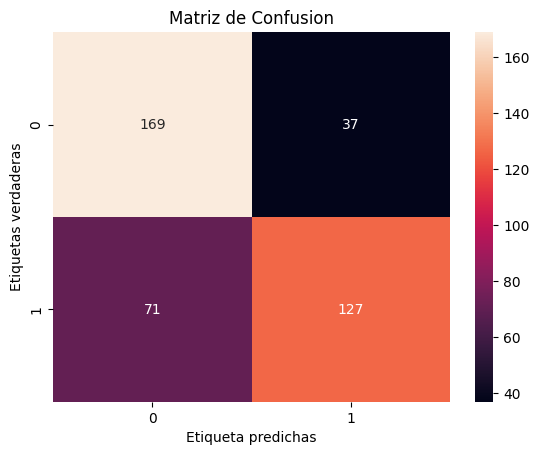

In [ ]:
# DIVIDIMOS DATOS EN ENTRENAMIENTO Y TESTEO
X_train80, X_test20, y_train80, y_test20 = train_test_split(dataFrame_100_MOODELO.iloc[:,:-1], dataFrame_100_MOODELO.iloc[:,-1], test_size=0.2, random_state=42)
# MEJOR MODELO PLANTEADO:
svc_best = SVC(kernel='rbf',C=7, gamma =3)
# ENTRENAMIENTO:
svc_best.fit(X_train80, y_train80)
# PREDICCION UTILIZANDO EL MODELO:
y_pred = svc_best.predict(X_test20)
# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, y_pred))
# MATRIZ DE CONFUSION
c= confusion_matrix(y_test20,y_pred)
#plt.figure(figsize =(2,2))
sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

#**Tercer modelo de ML: ARBOL DE DECISION**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Resultado:
### -- criterion optimo = gini
### -- max depth optimo = 7
### -- Eficiencia = 0.7364921254543008
### -- Caracteristicas = danceability, energy, loudness, instrumentalness, valence, tempo, target
### -- Validacion cruzada utilizada = 5
### -- Indice = 219

In [ ]:
# MODELO ARBOL DE DECISION:

df_eficiencia = pd.DataFrame(columns=['Caracteristicas', 'Eficiencia', 'Mejores parametros'])

for combinacion in lista_a_procesar:
  # Creamos los diferentes dataSet con las diferentes combinaciones de caracteristicas para analizar.
  dataFrame_100 = dataSetTrabajo[combinacion]

  # Separamos los datos de las etiquetas: target.
  X = dataFrame_100.iloc[:, :-1].values
  y = dataFrame_100.iloc[:, -1].values

  # Separamos los datos en Entrenamiento y Testeo:
  X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=42)

  # Clasificador
  tree_classifier = DecisionTreeClassifier()

  # Parametros:
  param_grid = {
    'max_depth': list(range(3,10)),
    'criterion': ['gini', 'entropy']}

  # Buscamos el GridSerchCV optimo:
  tree_gscv = GridSearchCV(tree_classifier, param_grid, cv=5)

  # Entrenamos el modelo optimo
  tree_gscv.fit(X_train80, y_train80.ravel())

  # Prediccion:
  y_pred = tree_gscv.predict(X_test20)

  # Parametros optimos:
  best_param = tree_gscv.best_params_
  accuracy = tree_gscv.best_score_

  # Creamos el registro
  registro_incorporar = {'Caracteristicas': combinacion, 'Eficiencia': accuracy, 'Mejores parametros': best_param}
  # convierto la estructura de diccionario a dataFrame para incorporar al dataFrame.
  df_regitro_incorporar = pd.DataFrame([registro_incorporar])
  # Incorporo el registro al dataFrame existente:
  df_eficiencia.loc[len(df_eficiencia)] = df_regitro_incorporar.loc[0]


df_eficiencia.reset_index()
# Ordenamos el dataFrame de mayor a menor para conocer la mayor Eficiencia y la estructura optima
df_ordenado = df_eficiencia.sort_values('Eficiencia', ascending=False)
df_ordenado


Caracteristicas Eficiencia  \
219  [danceability, energy, loudness, instrumentaln...   0.736492   
167  [danceability, energy, speechiness, instrument...   0.732202   
174  [danceability, loudness, speechiness, acoustic...   0.730944   
162  [danceability, energy, loudness, instrumentaln...   0.730941   
220  [danceability, energy, speechiness, acousticne...   0.730339   
..                                                 ...        ...   
12                             [energy, tempo, target]   0.580888   
20                      [speechiness, valence, target]   0.567277   
27                            [valence, tempo, target]   0.566644   
23                     [acousticness, valence, target]   0.560431   
11                           [energy, valence, target]   0.558566   

                           Mejores parametros  
219     {'criterion': 'gini', 'max_depth': 7}  
167     {'criterion': 'gini', 'max_depth': 6}  
174  {'criterion': 'entropy', 'max_depth': 6}  
162     {'criterion': 'gini', 'max_depth': 5}  
220  {'criterion': 'entropy', 'max_depth': 6}  
..                                        ...  
12      {'criterion': 'gini', 'max_depth': 9}  
20      {'criterion': 'gini', 'max_depth': 5}  
27   {'criterion': 'entropy', 'max_depth': 3}  
23      {'criterion': 'gini', 'max_depth': 4}  
11   {'criterion': 'entropy', 'max_depth': 5}  

[247 rows x 3 columns]

## En funcion del mejor modelo obtenido anteriormente, vamos a ver su consistencia ante la variacion en los datos utilizados, utilizando diferentes semillas.

## Resultado mejor semilla: 80

In [ ]:
# Semilla aplicada:
lista_semillas = [1,15,30,80,100]

for semilla in lista_semillas:
  # Creamos los diferentes dataSet con las diferentes combinaciones de caracteristicas para analizar.
  dataFrame_100 = dataSetTrabajo[['danceability','energy','loudness','instrumentalness', 'valence', 'tempo','target']]

  # Separamos los datos de las etiquetas: target.
  X = dataFrame_100.iloc[:, :-1].values
  y = dataFrame_100.iloc[:, -1].values

  # Separamos los datos en Entrenamiento y Testeo:
  X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=semilla)

  # Creamos el modelo:
  clasificadorARBOL = DecisionTreeClassifier(criterion= 'gini', max_depth= 7)
  clasificadorARBOL.fit(X_train80, y_train80.ravel())

  # Prediccion:
  y_pred = clasificadorARBOL.predict(X_test20)

  # Accuracy
  accuracy = accuracy_score(y_test20, y_pred)
  score = cross_val_score(clasificadorARBOL, X_train80, y_train80.ravel(), cv=5)

  print(f"---- Semillas {semilla}")
  print(f"****** Modelo Eficiencia: {accuracy}")
  print(f"****** Modelo Score: {score}")
  print(f"****** Modelo Score promedio: {score.mean()}")

---- Semillas 1
****** Modelo Eficiencia: 0.7153465346534653
****** Modelo Score: [0.74303406 0.6625387  0.71517028 0.69254658 0.71118012]
****** Modelo Score promedio: 0.7048939484260524
---- Semillas 15
****** Modelo Eficiencia: 0.7202970297029703
****** Modelo Score: [0.70278638 0.6625387  0.71826625 0.70186335 0.70186335]
****** Modelo Score promedio: 0.6974636078687768
---- Semillas 30
****** Modelo Eficiencia: 0.6633663366336634
****** Modelo Score: [0.6749226  0.73993808 0.70897833 0.74223602 0.67391304]
****** Modelo Score promedio: 0.7079976155221813
---- Semillas 80
****** Modelo Eficiencia: 0.7351485148514851
****** Modelo Score: [0.65634675 0.70588235 0.73374613 0.67080745 0.75465839]
****** Modelo Score promedio: 0.7042882141414919
---- Semillas 100
****** Modelo Eficiencia: 0.7128712871287128
****** Modelo Score: [0.67182663 0.72136223 0.68111455 0.68322981 0.69565217]
****** Modelo Score promedio: 0.690637078630079


##Creamos la MATRIZ DE CONFUSION para ver los ressultados de la aplicacion del modelo.

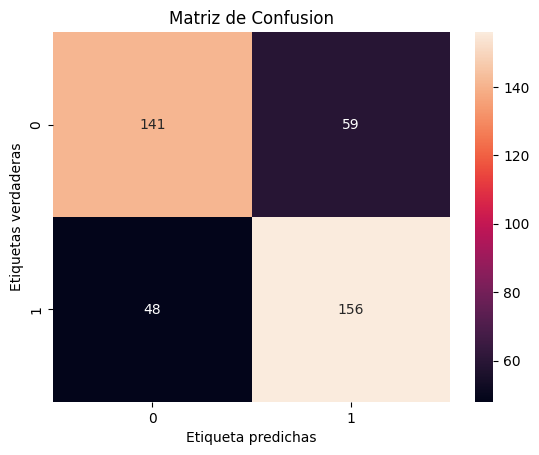

Score de validacion accuracy: 0.4603960396039604
Score de validacion cruzada: [0.65634675 0.70588235 0.73374613 0.68012422 0.75465839]
Media de los scores: 0.7061515681787589
Desviacion estandar de los scores: 0.035418600380126994


In [ ]:
# DataFRame
dataFrame_100 = dataSetTrabajo[['danceability','energy','loudness','instrumentalness', 'valence', 'tempo','target']]
# Caracteristicas y Target
X = dataFrame_100.iloc[:, :-1].values
y = dataFrame_100.iloc[:, -1].values
# DIVIDIMOS DATOS EN ENTRENAMIENTO Y TESTEO
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=80)
# MEJOR MODELO
# Creamos el modelo:
clasificadorARBOL = DecisionTreeClassifier(criterion= 'gini', max_depth= 7)
clasificadorARBOL.fit(X_train80, y_train80.ravel())
scores = cross_val_score(clasificadorARBOL,X_train80, y_train80.ravel(), cv=5)
accuracy = accuracy_score(y_test20, y_pred)
# Prediccion:
y_pred = clasificadorARBOL.predict(X_test20)
# MATRIZ DE CONFUSION
c= confusion_matrix(y_test20,y_pred)

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

# Score de validacion cruzada:
print(f"Score de validacion accuracy: {accuracy}")
print(f"Score de validacion cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviacion estandar de los scores: {scores.std()}")


#**Cuarto modelo de ML: NAIVE BAYES GAUSSIANO**

## Resultado:
### -- var_smoothing optimo = 1e-05
### -- Eficiencia = 0.6646058881218392
### -- Caracteristicas = 	danceability, loudness, speechiness, instrumentalness, tempo, target
### -- Validacion cruzada utilizada = 5
### -- Indice = 178

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# MODELO NAIVE BAYES GAUSIANO:

df_eficiencia = pd.DataFrame(columns=['Caracteristicas', 'Eficiencia', 'Var-smoothing'])

for combinacion in lista_a_procesar:
  # Creamos los diferentes dataSet con las diferentes combinaciones de caracteristicas para analizar.
  dataFrame_100 = dataSetTrabajo[combinacion]

  # Separamos los datos de las etiquetas: target.
  X = dataFrame_100.iloc[:, :-1].values
  y = dataFrame_100.iloc[:, -1].values

  # Separamos los datos en Entrenamiento y Testeo:
  X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=42)

  # Clasificador
  gausiano = GaussianNB()

  # Parametros:
  param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-5]}

  # Buscamos el GridSerchCV optimo:
  gausiano_gscv = GridSearchCV(gausiano, param_grid, cv=5)

  # Entrenamos el modelo optimo
  gausiano_gscv.fit(X_train80, y_train80.ravel())

  # Prediccion:
  y_pred = gausiano_gscv.predict(X_test20)

  # Parametros optimos:
  best_param = gausiano_gscv.best_params_['var_smoothing']
  accuracy = gausiano_gscv.best_score_

  # Creamos el registro
  registro_incorporar = {'Caracteristicas': combinacion, 'Eficiencia': accuracy, 'Var-smoothing': best_param}
  # convierto la estructura de diccionario a dataFrame para incorporar al dataFrame.
  df_regitro_incorporar = pd.DataFrame([registro_incorporar])
  # Incorporo el registro al dataFrame existente:
  df_eficiencia.loc[len(df_eficiencia)] = df_regitro_incorporar.loc[0]


df_eficiencia.reset_index()
# Ordenamos el dataFrame de mayor a menor para conocer la mayor Eficiencia y la estructura optima
df_ordenado = df_eficiencia.sort_values('Eficiencia', ascending=False)
df_ordenado


## En funcion del mejor modelo obtenido anteriormente, vamos a ver su consistencia ante la variacion en los datos utilizados, utilizando diferentes semillas.

In [ ]:
# Semilla aplicada:
lista_semillas = [1,15,30,80,100]

for semilla in lista_semillas:
  # Creamos los diferentes dataSet con las diferentes combinaciones de caracteristicas para analizar.
  dataFrame_100 = dataSetTrabajo[['danceability', 'loudness', 'speechiness', 'instrumentalness', 'tempo', 'target']]

  # Separamos los datos de las etiquetas: target.
  X = dataFrame_100.iloc[:, :-1].values
  y = dataFrame_100.iloc[:, -1].values

  # Separamos los datos en Entrenamiento y Testeo:
  X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=semilla)

  # Creamos el modelo:
  clasificadorBAYES = GaussianNB(var_smoothing=1e-5)
  clasificadorBAYES.fit(X_train80, y_train80.ravel())

  # Prediccion:
  y_pred = clasificadorBAYES.predict(X_test20)

  # Accuracy
  accuracy = accuracy_score(y_test20, y_pred)
  score = cross_val_score(clasificadorBAYES, X_train80, y_train80.ravel(), cv=5)

  print(f"---- Semillas {semilla}")
  print(f"****** Modelo Eficiencia: {accuracy}")
  print(f"****** Modelo Score: {score}")
  print(f"****** Modelo Score promedio: {score.mean()}")

---- Semillas 1
****** Modelo Eficiencia: 0.6881188118811881
****** Modelo Score: [0.66563467 0.61609907 0.68111455 0.61801242 0.6863354 ]
****** Modelo Score promedio: 0.6534392246601157
---- Semillas 15
****** Modelo Eficiencia: 0.6757425742574258
****** Modelo Score: [0.6625387  0.60371517 0.66563467 0.69254658 0.67080745]
****** Modelo Score promedio: 0.6590485164317443
---- Semillas 30
****** Modelo Eficiencia: 0.6856435643564357
****** Modelo Score: [0.64396285 0.67801858 0.66563467 0.63354037 0.66770186]
****** Modelo Score promedio: 0.6577716670192104
---- Semillas 80
****** Modelo Eficiencia: 0.6608910891089109
****** Modelo Score: [0.70588235 0.62229102 0.64396285 0.67080745 0.66459627]
****** Modelo Score promedio: 0.6615079899236582
---- Semillas 100
****** Modelo Eficiencia: 0.698019801980198
****** Modelo Score: [0.63157895 0.6749226  0.67182663 0.6552795  0.66770186]
****** Modelo Score promedio: 0.660261907966848


##Creamos la MATRIZ DE CONFUSION para ver los ressultados de la aplicacion del modelo.

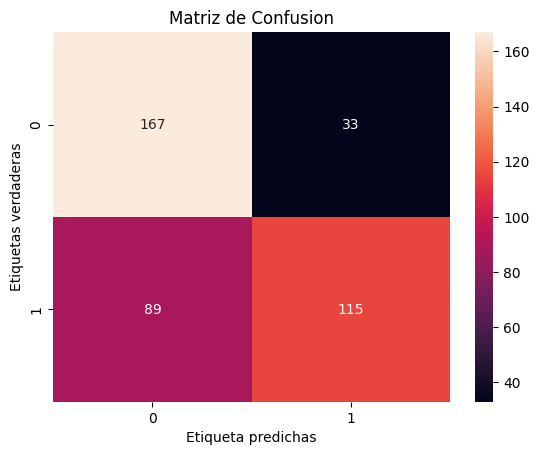

Score de validacion accuracy: 0.698019801980198
Score de validacion cruzada: [0.63157895 0.6749226  0.67182663 0.6552795  0.66770186]
Media de los scores: 0.660261907966848
Desviacion estandar de los scores: 0.015821302861080987


In [ ]:
# DataFRame
dataFrame_100 = dataSetTrabajo[['danceability', 'loudness', 'speechiness', 'instrumentalness', 'tempo', 'target']]
# Caracteristicas y Target
X = dataFrame_100.iloc[:, :-1].values
y = dataFrame_100.iloc[:, -1].values
# DIVIDIMOS DATOS EN ENTRENAMIENTO Y TESTEO
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=100)
# MEJOR MODELO
# Creamos el modelo:
clasificadorBAYES = GaussianNB(var_smoothing=1e-5)
clasificadorBAYES.fit(X_train80, y_train80.ravel())
scores = cross_val_score(clasificadorBAYES,X_train80, y_train80.ravel(), cv=5)
accuracy = accuracy_score(y_test20, y_pred)
# Prediccion:
y_pred = clasificadorBAYES.predict(X_test20)
# MATRIZ DE CONFUSION
c= confusion_matrix(y_test20,y_pred)
sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

# Score de validacion cruzada:
print(f"Score de validacion accuracy: {accuracy}")
print(f"Score de validacion cruzada: {scores}")
print(f"Media de los scores: {scores.mean()}")
print(f"Desviacion estandar de los scores: {scores.std()}")


#**ENSAMBLE: Entrenamiento**

## Entrenamos los 4 modelos con los mejores parametros posibles, manteniendo la semilla 42.

##MODELO-KNN

In [ ]:
# Creamos los diferentes dataSet con las diferentes combinaciones de caracteristicas para analizar.
dataFrame_100 = dataSetTrabajo[['energy','speechiness','acousticness','instrumentalness','target']]

# Separamos los datos de las etiquetas: target.
X = dataFrame_100.iloc[:, :-1].values
y = dataFrame_100.iloc[:, -1].values

# Separamos los datos en Entrenamiento y Testeo:
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo:
clasificadorKNN = KNeighborsClassifier(n_neighbors=12)
clasificadorKNN.fit(X_train80, y_train80.ravel())

knn_prediction = clasificadorKNN.predict(X_test20)


##MODELO: SVM - RBF

In [ ]:
# CONJUNTO DETOS OPTIMOS:
dataFrame_100_MOODELO = dataSetTrabajo[['danceability','energy','speechiness','instrumentalness','valence','target']]
dataFrame_100_MOODELO.target

X_train80, X_test20, y_train80, y_test20 = train_test_split(dataFrame_100_MOODELO.iloc[:,:-1], dataFrame_100_MOODELO.iloc[:,-1], test_size=0.2, random_state=42)
# MEJOR MODELO PLANTEADO:
svc_best = SVC(kernel='rbf',C=7, gamma =3)
# ENTRENAMIENTO:
svc_best.fit(X_train80, y_train80)

svc_prediction = svc_best.predict(X_test20)

##MODELO: ARBOL-DE-DESICION

In [ ]:
# DataFRame
dataFrame_100 = dataSetTrabajo[['danceability','energy','loudness','instrumentalness', 'valence', 'tempo','target']]

# Caracteristicas y Target
X = dataFrame_100.iloc[:, :-1].values
y = dataFrame_100.iloc[:, -1].values

# DIVIDIMOS DATOS EN ENTRENAMIENTO Y TESTEO
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=42)

# MEJOR MODELO PLANTEADO:
arbol = DecisionTreeClassifier(criterion= 'gini', max_depth= 7)
arbol.fit(X_train80, y_train80.ravel())

# Prediccion:
arbol_prediction = arbol.predict(X_test20)

##MODELO: BAYES-GAUSIANO

In [ ]:
# DataFRame
dataFrame_100 = dataSetTrabajo[['danceability', 'loudness', 'speechiness', 'instrumentalness', 'tempo', 'target']]

# Caracteristicas y Target
X = dataFrame_100.iloc[:, :-1].values
y = dataFrame_100.iloc[:, -1].values

# DIVIDIMOS DATOS EN ENTRENAMIENTO Y TESTEO
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=42)

# MEJOR MODELO PLANTEADO:
bayes = GaussianNB(var_smoothing=1e-5)
bayes.fit(X_train80, y_train80.ravel())

# Prediccion:
bayes_prediction = bayes.predict(X_test20)

#ENSAMBLE: Resultados

## En el ensamble vamos a comparar distintas combinaciones para obtener la prediccion mas optima.

##Cuatro modelos

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       206
           1       0.80      0.52      0.63       198

    accuracy                           0.70       404
   macro avg       0.73      0.70      0.69       404
weighted avg       0.73      0.70      0.69       404



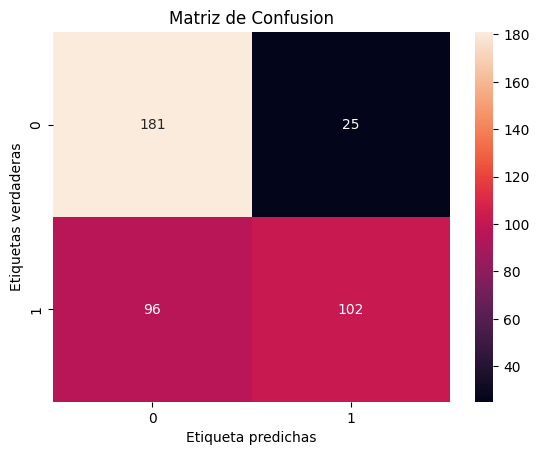

In [ ]:
final_predictions = []
for k,s,a,b in zip(knn_prediction, svc_prediction, arbol_prediction, bayes_prediction):
  votes = {0:0, 1:0, 2:0, 3:0}
  votes[k] +=1
  votes[s] +=1
  votes[a] +=1
  votes[b] +=1


  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()


##Tres modelos: knn, svc, tree

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       206
           1       0.79      0.64      0.71       198

    accuracy                           0.74       404
   macro avg       0.75      0.74      0.74       404
weighted avg       0.75      0.74      0.74       404



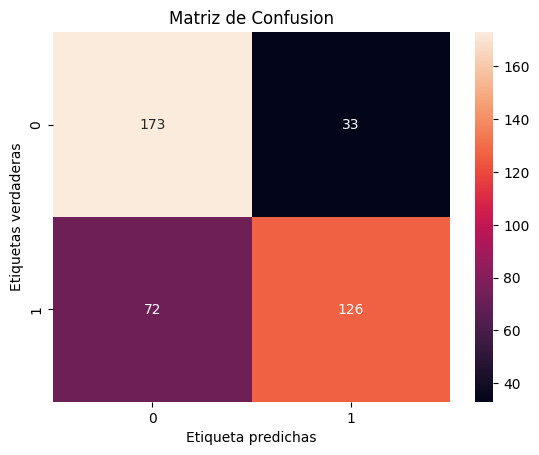

In [ ]:
final_predictions = []
for k,s,a in zip(knn_prediction, svc_prediction, arbol_prediction):
  votes = {0:0, 1:0, 2:0}
  votes[k] +=1
  votes[s] +=1
  votes[a] +=1

  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

##Tres modelos: knn, svc, gauss

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       206
           1       0.78      0.57      0.66       198

    accuracy                           0.71       404
   macro avg       0.73      0.71      0.71       404
weighted avg       0.73      0.71      0.71       404



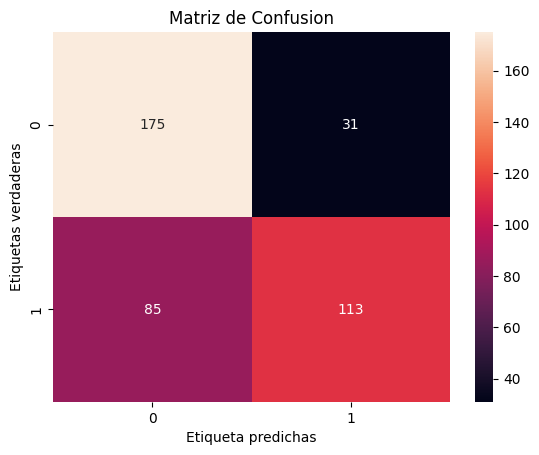

In [ ]:
final_predictions = []
for k,s,b in zip(knn_prediction, svc_prediction, bayes_prediction):
  votes = {0:0, 1:0, 2:0}
  votes[k] +=1
  votes[s] +=1
  votes[b] +=1


  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

##Tres modelos: knn, gauss, tree

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       206
           1       0.76      0.61      0.68       198

    accuracy                           0.72       404
   macro avg       0.72      0.71      0.71       404
weighted avg       0.72      0.72      0.71       404



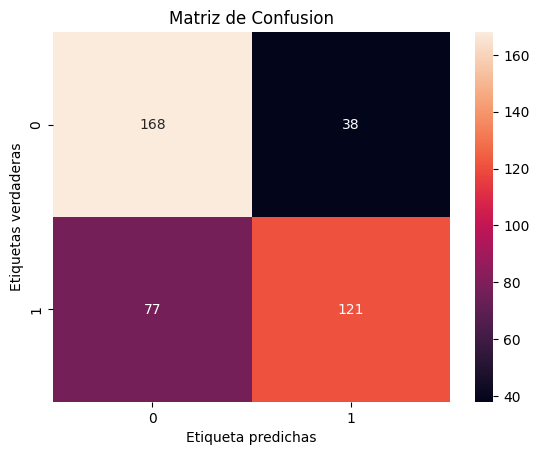

In [ ]:
final_predictions = []
for k,a,b in zip(knn_prediction, arbol_prediction, bayes_prediction):
  votes = {0:0, 1:0, 2:0}
  votes[k] +=1
  votes[a] +=1
  votes[b] +=1


  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

##Tres modelos: gauss, svc, tree

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       206
           1       0.77      0.65      0.70       198

    accuracy                           0.73       404
   macro avg       0.74      0.73      0.73       404
weighted avg       0.74      0.73      0.73       404



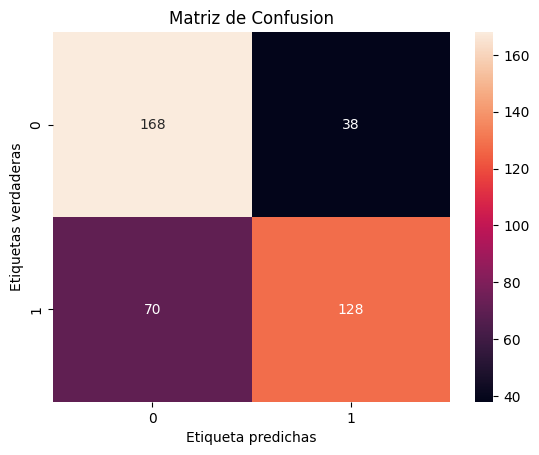

In [ ]:
final_predictions = []
for s,a,b in zip(svc_prediction, arbol_prediction, bayes_prediction):
  votes = {0:0, 1:0, 2:0}
  votes[s] +=1
  votes[a] +=1
  votes[b] +=1


  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

##Dos modelos: knn, svc

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.63      0.90      0.75       206
           1       0.82      0.46      0.59       198

    accuracy                           0.69       404
   macro avg       0.73      0.68      0.67       404
weighted avg       0.73      0.69      0.67       404



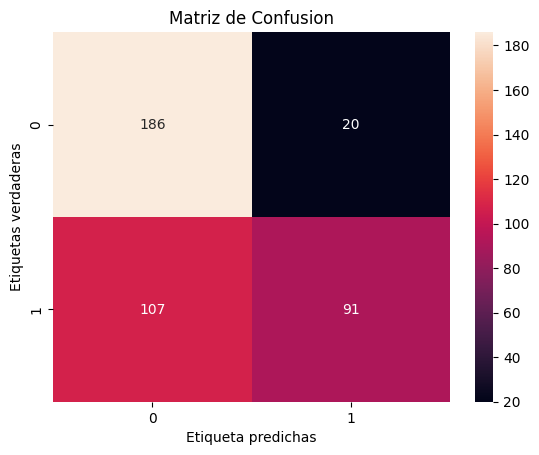

In [ ]:
final_predictions = []
for k,s in zip(knn_prediction, svc_prediction):
  votes = {0:0, 1:0}
  votes[k] +=1
  votes[s] +=1

  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

##Dos modelos: knn, tree

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.62      0.89      0.73       206
           1       0.79      0.44      0.57       198

    accuracy                           0.67       404
   macro avg       0.71      0.67      0.65       404
weighted avg       0.71      0.67      0.65       404



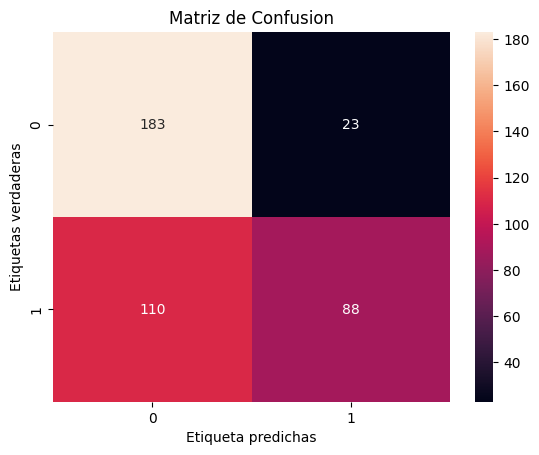

In [ ]:
final_predictions = []
for k,a in zip(knn_prediction, arbol_prediction):
  votes = {0:0, 1:0}
  votes[k] +=1
  votes[a] +=1


  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

##Dos modelos: knn, gauss

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.61      0.88      0.73       206
           1       0.78      0.42      0.55       198

    accuracy                           0.66       404
   macro avg       0.70      0.65      0.64       404
weighted avg       0.69      0.66      0.64       404



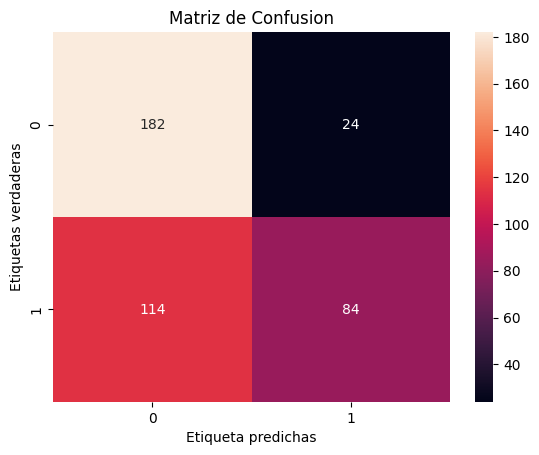

In [ ]:
final_predictions = []
for k,b in zip(knn_prediction, bayes_prediction):
  votes = {0:0, 1:0}
  votes[k] +=1
  votes[b] +=1

  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

##Dos modelos: svc, tree

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       206
           1       0.83      0.51      0.63       198

    accuracy                           0.71       404
   macro avg       0.75      0.71      0.70       404
weighted avg       0.74      0.71      0.70       404



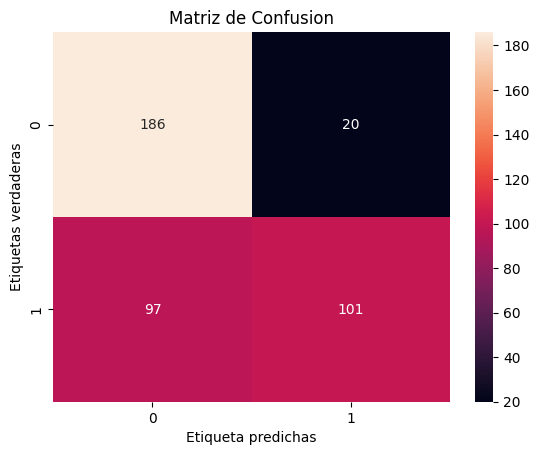

In [ ]:
final_predictions = []
for s,a in zip(svc_prediction, arbol_prediction):
  votes = {0:0, 1:0}
  votes[s] +=1
  votes[a] +=1


  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

##Dos modelos: svc, gauss

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.64      0.91      0.75       206
           1       0.83      0.47      0.60       198

    accuracy                           0.70       404
   macro avg       0.74      0.69      0.68       404
weighted avg       0.74      0.70      0.68       404



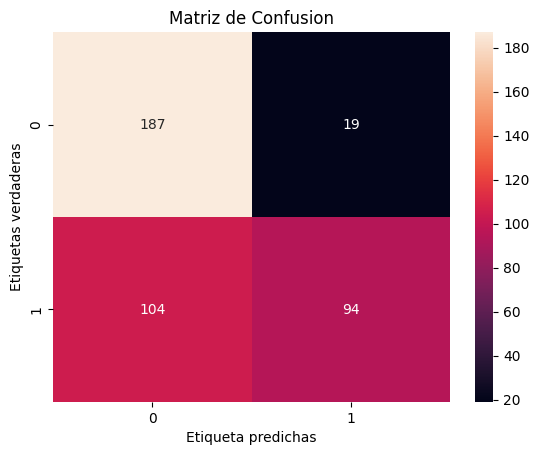

In [ ]:
final_predictions = []
for s,b in zip(svc_prediction, bayes_prediction):
  votes = {0:0, 1:0}
  votes[s] +=1
  votes[b] +=1

  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

##Dos modelos: tree, gauss

Reporte de Clasificacion: 

              precision    recall  f1-score   support

           0       0.62      0.88      0.73       206
           1       0.78      0.45      0.57       198

    accuracy                           0.67       404
   macro avg       0.70      0.66      0.65       404
weighted avg       0.70      0.67      0.65       404



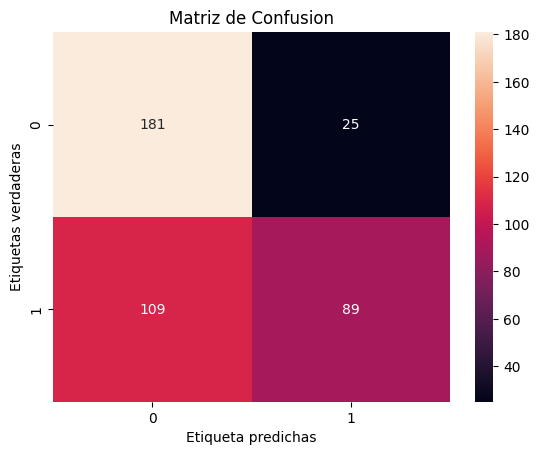

In [ ]:
final_predictions = []
for a,b in zip(arbol_prediction, bayes_prediction):
  votes = {0:0, 1:0}
  votes[a] +=1
  votes[b] +=1


  majority_vote = max(votes, key=votes.get)
  final_predictions.append(majority_vote)

c= confusion_matrix(y_test20, final_predictions)

# REPORTE DE CLASIFICACION:
print("Reporte de Clasificacion: \n")
print(classification_report(y_test20, final_predictions))

sns.heatmap(c, annot=True, fmt='g')
plt.xlabel('Etiqueta predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusion')
plt.show()

# Comclusiones finales:

 Tras realizar las distintas combinaciones de modelos en el ensamblaje se puede notar una mayor para las etiquetas "0" que para las "1". Por otro lado, a medida que la precision de las etiquetas "0" se incrementa, la presicion de la etiqueta "1" disminuya.

Teniendo en cuenta lo anterior, el ensamble mas estable es el de 3 modelos:
 KNN, CSV Y TREE